[[ 1.         0.         0.       ]
 [ 0.         0.8660254  0.5      ]
 [ 0.        -0.5        0.8660254]]


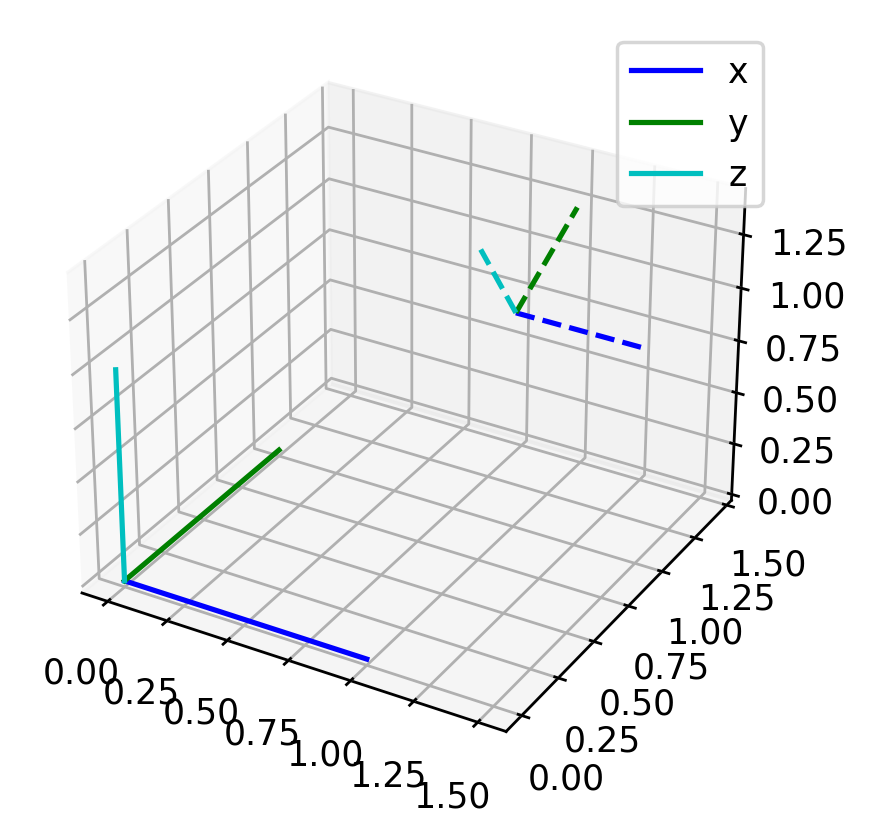

In [56]:

import numpy as np
from matplotlib import pyplot as plt 
from mpl_toolkits import mplot3d

class RT_PLOT():
    def __init__(self):
        self.glob_coord = np.array([[1,0,0], [0,1,0],[0,0,1]])

    def rot_mat(self, angles:list):
        Rx = np.array([[1,                   0,                  0],
                       [0,   np.cos(angles[0]), -np.sin(angles[0])],
                       [0,   np.sin(angles[0]),  np.cos(angles[0])]])

        Ry = np.array([[ np.cos(angles[1]),    0,   np.sin(angles[1])],
                       [                 0,    1,                   0],
                       [-np.sin(angles[1]),    0,   np.cos(angles[1])]])

        Rz = np.array([[np.cos(angles[2]),  -np.sin(angles[2]), 0],
                       [np.sin(angles[2]),   np.cos(angles[2]), 0],
                       [                0,                   0, 1]])

        rot = Rx@Ry@Rz 
        return rot

    def get_R_T_matrix(self, ang, disp):
        ang = -np.array(ang)*np.pi/180
        # get rotation matrix
        R = np.array(self.glob_coord @ self.rot_mat(ang))
        # make RT matrix
        T = np.array(np.zeros([4,4]))
        for i in range(3):
            for j in range(3):
                if np.abs(R[i,j]) < (1.0e-15) :
                    R[i,j] = 0
                T[i,j] = R[i,j]
        for i in range(4):
            if i != 3:
                T[i,3] = disp[i]
            else:
                T[3,3] = 1
        return R, T

    def plot_coords(self, ang:list, disp:list):
        
        # objetc coordinate
        R, T = self.get_R_T_matrix(ang, disp)
        new_coord = self.glob_coord @ R
        new_coord = np.array(new_coord)
        print(new_coord)
        scale = 0.5
        x = [[T[0,3], T[0,3]+new_coord[0,0]*scale], [T[1,3], T[1,3]+new_coord[0,1]*scale], [T[2,3],T[2,3]+new_coord[0,2]*scale]]
        y = [[T[0,3], T[0,3]+new_coord[1,0]*scale], [T[1,3], T[1,3]+new_coord[1,1]*scale], [T[2,3],T[2,3]+new_coord[1,2]*scale]]
        z = [[T[0,3], T[0,3]+new_coord[2,0]*scale], [T[1,3], T[1,3]+new_coord[2,1]*scale], [T[2,3],T[2,3]+new_coord[2,2]*scale]]

        # pyplot config
        fig = plt.figure(dpi=250)
        ax = plt.axes(projection='3d')
        
        # plot global coordinate
        ax.plot([0,1], [0,0], [0,0], 'b-') # - blue: x 
        ax.plot([0,0], [0,1], [0,0], 'g-') # - green: y
        ax.plot([0,0], [0,0], [0,1], 'c-') # - cian: z
        # plot object coordinate
        ax.plot(x[0], x[1], x[2], 'b--') # blue: x
        ax.plot(y[0], y[1], y[2], 'g--') # blue: x
        ax.plot(z[0], z[1], z[2], 'c--') # blue: x
        ax.legend(['x', 'y', 'z'])

        plt.show()
    




disp = [1,1,1] #
ang = [30,0,0] # [deg]


rt_plt = RT_PLOT()
rt_plt.plot_coords(ang, disp)